In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import preprocessing



In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Visualizations

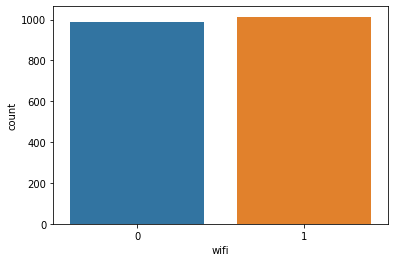

In [7]:
sns.countplot(x = "wifi",data=train)

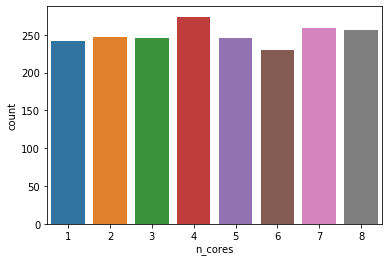

In [8]:
sns.countplot(x = "n_cores",data=train)

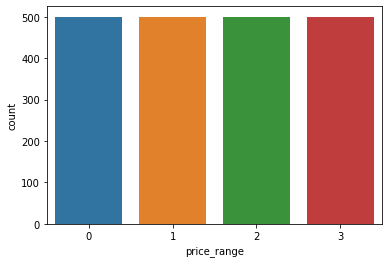

In [9]:
sns.countplot(x = "price_range",data=train)

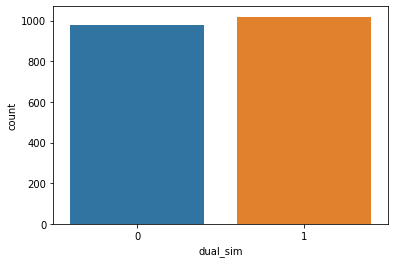

In [10]:
sns.countplot(x = "dual_sim",data=train)

In [11]:
range_mapping = {0: "cheap",
    1: "standard",
    2: "expensive",
    3: "very expensive"}

In [12]:
train['price_range_mapped'] = train['price_range'].map(range_mapping)

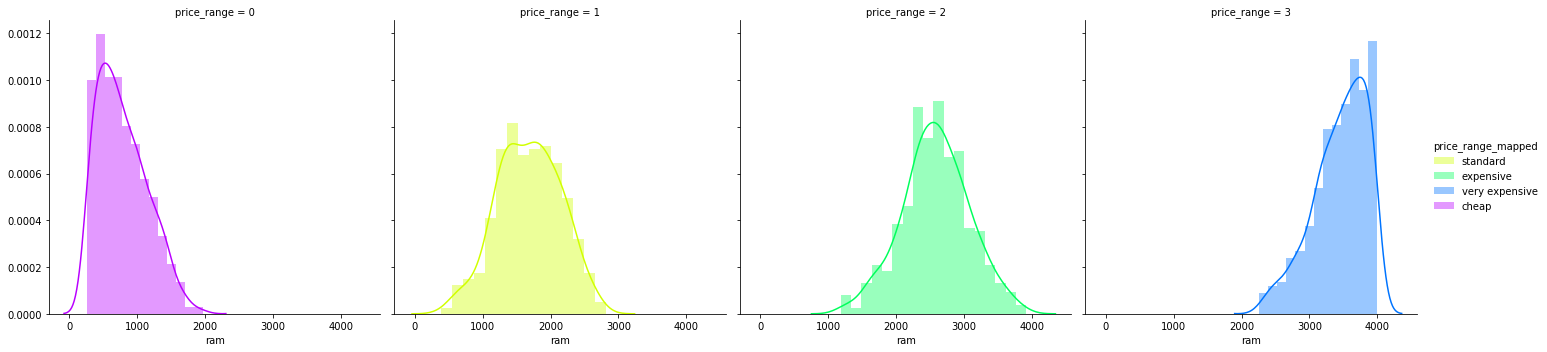

In [13]:
grid = sns.FacetGrid(train, col="price_range", hue="price_range_mapped", palette="hsv",height=5
                   )
grid.map(sns.distplot, "ram").add_legend();

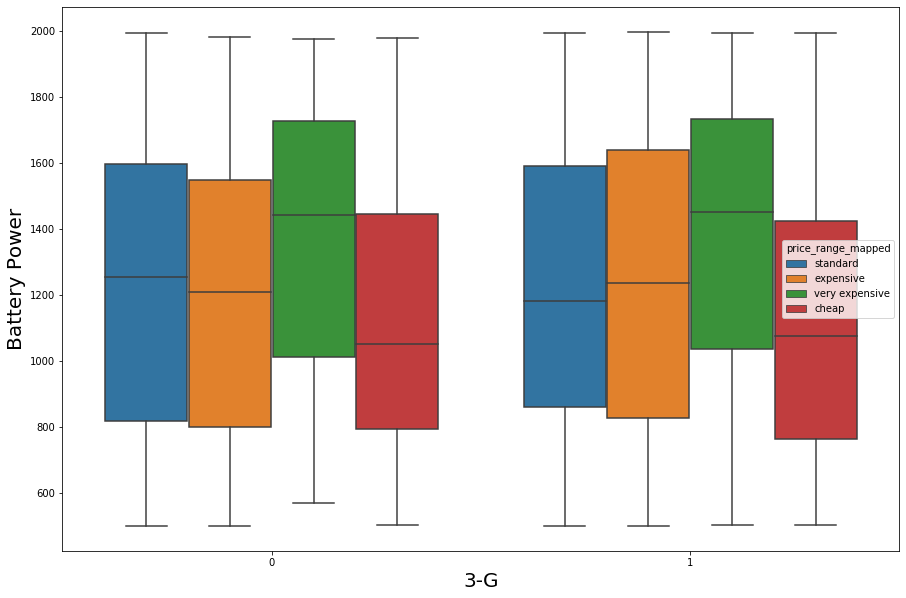

In [14]:
plt.figure(figsize = (15,10))
sns.boxplot(x="three_g", y="battery_power", hue = "price_range_mapped", data = train)
plt.xlabel("3-G", fontsize = 20)
plt.ylabel("Battery Power", fontsize = 20)

plt.show()

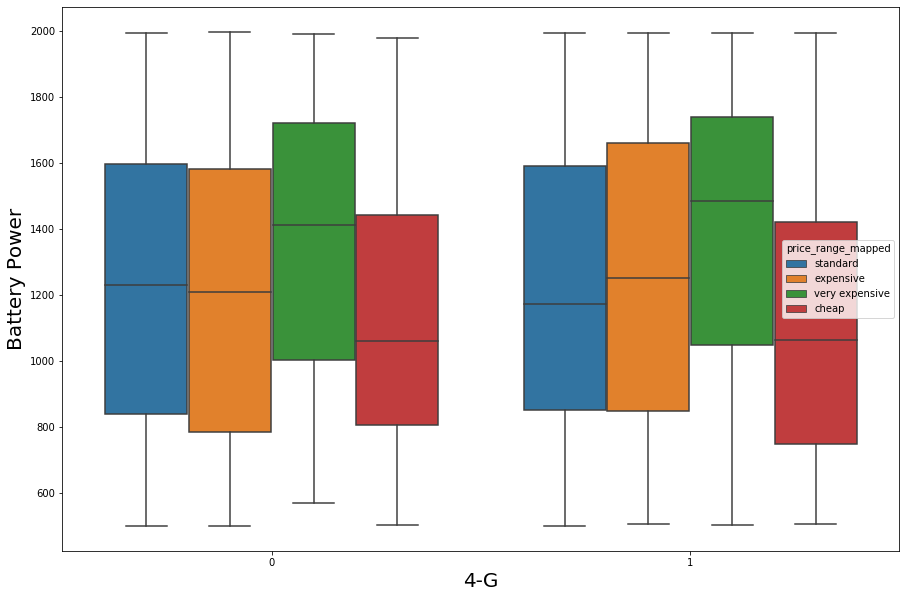

In [15]:
plt.figure(figsize = (15,10))
sns.boxplot(x="four_g", y="battery_power", hue = "price_range_mapped", data = train)
plt.xlabel("4-G", fontsize = 20)
plt.ylabel("Battery Power", fontsize = 20)

plt.show()

Data Preprocessing

In [16]:
features = ['battery_power', 'blue', 'clock_speed','dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
            'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = ['price_range']

In [17]:
x = train[features].values
y = train[target].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 24)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print("confussion matrix")
print(lr_conf_matrix)

confussion matrix
[[135   1   0   0]
 [  1 120   2   0]
 [  0   8 116   3]
 [  0   0   2 112]]


In [22]:
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

Accuracy of Logistic Regression: 96.6 



In [23]:

print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       136
           1       0.93      0.98      0.95       123
           2       0.97      0.91      0.94       127
           3       0.97      0.98      0.98       114

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



Naive Bayes Model

In [24]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print("confussion matrix")
print(nb_conf_matrix)

confussion matrix
[[119  16   1   0]
 [  5  94  24   0]
 [  0  24  88  15]
 [  0   0  15  99]]


In [26]:
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')

Accuracy of Naive Bayes model: 80.0 



In [27]:
print(classification_report(y_test,nbpred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       136
           1       0.70      0.76      0.73       123
           2       0.69      0.69      0.69       127
           3       0.87      0.87      0.87       114

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.81      0.80      0.80       500



Decision Tree Classifier

In [28]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

In [29]:
print("confussion matrix")
print(dt_conf_matrix)

confussion matrix
[[121  15   0   0]
 [  8  99  16   0]
 [  0  24  91  12]
 [  0   0  14 100]]


In [30]:
print("Accuracy of Decision Tree Classifier",dt_acc_score*100,'\n')

Accuracy of Decision Tree Classifier 82.19999999999999 



In [31]:
print(classification_report(y_test,dt_predicted))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       136
           1       0.72      0.80      0.76       123
           2       0.75      0.72      0.73       127
           3       0.89      0.88      0.88       114

    accuracy                           0.82       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500



In [32]:
comparison = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Decision Tree Classifier'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,dt_acc_score*100]})
comparison

,Model,Accuracy
0,Logistic Regression,96.6
1,Naive Bayes,80.0
2,Decision Tree Classifier,82.2


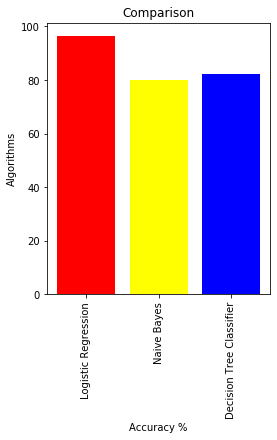

In [33]:
plt.figure(figsize=(4,5))
plt.title("Comparison")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(comparison['Model'],comparison['Accuracy'],color = ['red','yellow','blue'])
plt.show()